   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

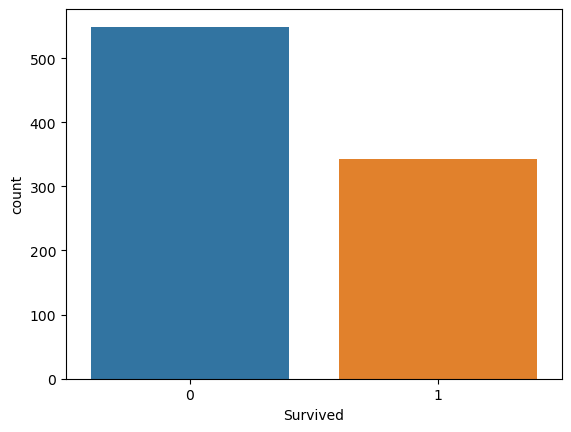

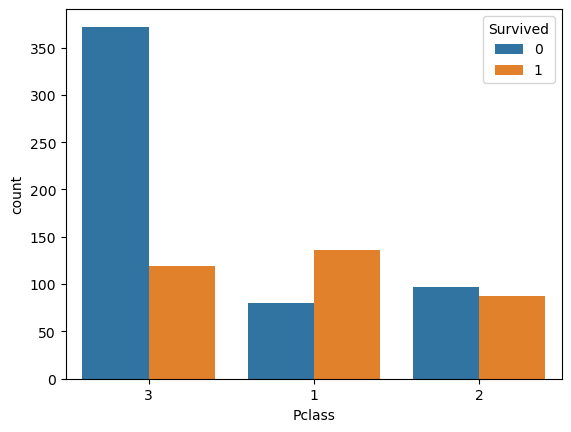

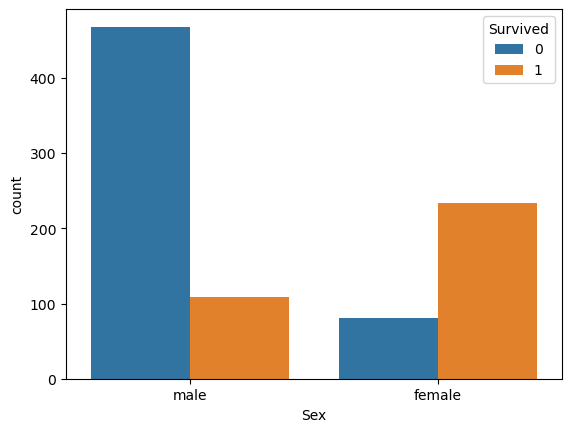

C:\Users\JCLM\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


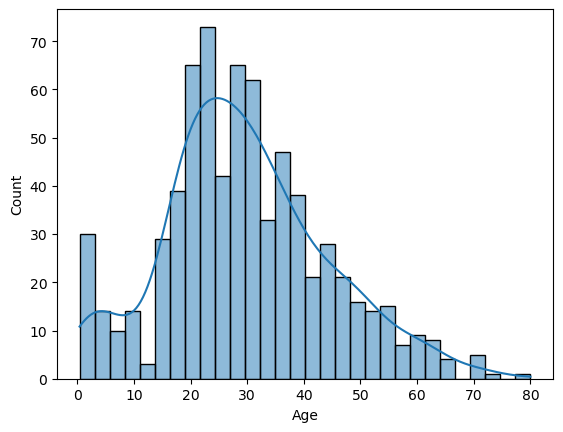

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
Confusion Matrix:
[[90 15]
 [19 55]]


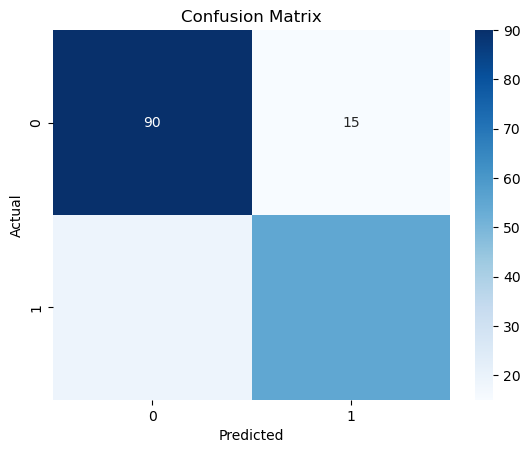

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
data = pd.read_csv('D:/Universidad/11º Semestre/Analisis de Datos/Tarea 5/Titanic-dataset.csv')

# Mostrar las primeras filas del dataset
print(data.head())

# Información básica del dataset
print(data.info())

# Estadísticas descriptivas
print(data.describe())

# Asegurarse de que las columnas categóricas sean de tipo cadena
data['Survived'] = data['Survived'].astype(str)
data['Pclass'] = data['Pclass'].astype(str)
data['Sex'] = data['Sex'].astype(str)

# Análisis gráfico
sns.countplot(data=data, x='Survived')
plt.show()

sns.countplot(data=data, x='Pclass', hue='Survived')
plt.show()

sns.countplot(data=data, x='Sex', hue='Survived')
plt.show()

sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.show()

# Manejar valores faltantes
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Transformar variables categóricas en variables dummy
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Selección de características relevantes
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = data[features]
y = data['Survived'].astype(int)

# División del dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predicciones
y_pred = log_reg.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
